In [33]:
import requests
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [34]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '59e2dfca5859e44a55ef766a8f81aab1ab8a80e8'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [35]:
response = get_stock_data('AAPL', '2020-1-1', '2020-5-2')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2020-1-1&endDate=2020-5-2&token=59e2dfca5859e44a55ef766a8f81aab1ab8a80e8
[{'date': '2020-01-02T00:00:00.000Z', 'close': 300.35, 'high': 300.6, 'low': 295.19, 'open': 296.24, 'volume': 33870100, 'adjClose': 74.5721509156, 'adjHigh': 74.6342219585, 'adjLow': 73.2910045906, 'adjOpen': 73.5517029707, 'adjVolume': 135480400, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-01-03T00:00:00.000Z', 'close': 297.43, 'high': 300.58, 'low': 296.5, 'open': 297.15, 'volume': 36580700, 'adjClose': 73.8471611348, 'adjHigh': 74.6292562751, 'adjLow': 73.6162568553, 'adjOpen': 73.7776415668, 'adjVolume': 146322800, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-01-06T00:00:00.000Z', 'close': 299.8, 'high': 299.96, 'low': 292.75, 'open': 293.79, 'volume': 29596800, 'adjClose': 74.4355946213, 'adjHigh': 74.4753200887, 'adjLow': 72.6851912121, 'adjOpen': 72.9434067505, 'adjVolume': 118387200, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '202

In [36]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [37]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)

['2020-01-02T00:00:00.000Z', '2020-01-03T00:00:00.000Z', '2020-01-06T00:00:00.000Z', '2020-01-07T00:00:00.000Z', '2020-01-08T00:00:00.000Z', '2020-01-09T00:00:00.000Z', '2020-01-10T00:00:00.000Z', '2020-01-13T00:00:00.000Z', '2020-01-14T00:00:00.000Z', '2020-01-15T00:00:00.000Z', '2020-01-16T00:00:00.000Z', '2020-01-17T00:00:00.000Z', '2020-01-21T00:00:00.000Z', '2020-01-22T00:00:00.000Z', '2020-01-23T00:00:00.000Z', '2020-01-24T00:00:00.000Z', '2020-01-27T00:00:00.000Z', '2020-01-28T00:00:00.000Z', '2020-01-29T00:00:00.000Z', '2020-01-30T00:00:00.000Z', '2020-01-31T00:00:00.000Z', '2020-02-03T00:00:00.000Z', '2020-02-04T00:00:00.000Z', '2020-02-05T00:00:00.000Z', '2020-02-06T00:00:00.000Z', '2020-02-07T00:00:00.000Z', '2020-02-10T00:00:00.000Z', '2020-02-11T00:00:00.000Z', '2020-02-12T00:00:00.000Z', '2020-02-13T00:00:00.000Z', '2020-02-14T00:00:00.000Z', '2020-02-18T00:00:00.000Z', '2020-02-19T00:00:00.000Z', '2020-02-20T00:00:00.000Z', '2020-02-21T00:00:00.000Z', '2020-02-24T00:00:0

In [38]:
def calculate_price_difference(opens, closes):
    price_differences = []
    for i in range(len(opens) - 1):
        if opens[i + 1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    return price_differences

In [39]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences:
    differences.append(difference[0])

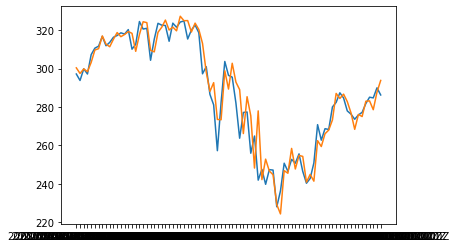

In [40]:
plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

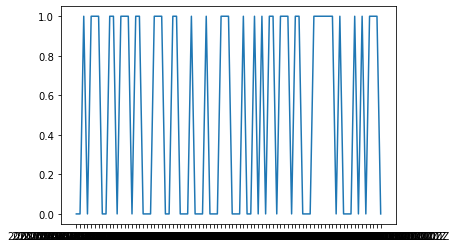

In [41]:
plt.plot(dates[1:], differences)
plt.show()

In [42]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
    
    return inputs, labels

In [43]:
x_train, y_train = create_datasets('AAPL', '2020-1-1', '2020-4-1')
x_test, y_test = create_datasets('AAPL', '2020-4-1', '2020-5-2')

In [44]:
#y = m*x + b
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5])
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])
W = tf.Variable(initial_value=tf.ones(shape=[5, 2]))
b = tf.Variable(initial_value=tf.ones(shape=[2]))
y_output = tf.add(tf.matmul(x_input, W), b)

In [45]:
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_input, logits=y_output)))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [46]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100

In [47]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [48]:
for _ in range(20000):
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
print(measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test))

42.857142857142854


In [49]:
print(session.run(
    y_output, feed_dict={x_input: x_test}), y_test)

[[-2771600.5  2861638.2]
 [-2664726.2  2749607.5]
 [-2324230.2  2391092.8]
 [-3071215.5  3174152. ]
 [-3121503.5  3225043.5]
 [-2794247.8  2880789.2]
 [-2745834.2  2829015.5]
 [-2461262.   2528919.8]
 [-3127517.   3227256.5]
 [-2521881.   2589710. ]
 [-2780829.   2861661.5]
 [-3317867.2  3427727.5]
 [-2488155.   2555374. ]
 [-2943223.2  3035871.2]
 [-2349740.5  2410455. ]
 [-2432122.   2496729.5]
 [-2462336.   2527815.8]
 [-2383445.8  2444234.5]
 [-2333444.8  2391689.5]
 [-2593783.8  2664699.5]
 [-3051762.5  3145605. ]] [[0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1]]
